<a href="https://colab.research.google.com/github/samuel2003-coder/3710-a2/blob/main/COMP3710_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

DFT

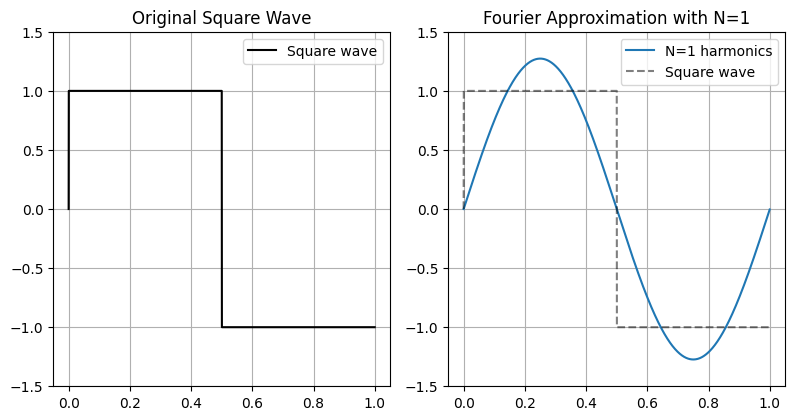

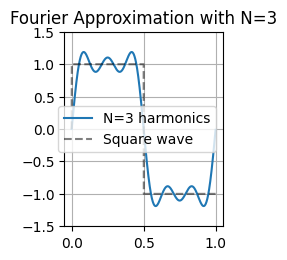

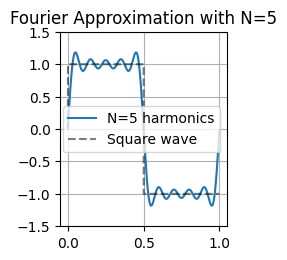

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Set parameters for the signal
N = 2048 # Number of sample points
T = 1.0 # Duration of the signal in seconds
f0 = 1 # Fundamental frequency of the square wave in Hz
# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5]
# Define the square wave function
def square_wave(t):
  return np.sign(np.sin(2.0 * np.pi * f0 * t))
# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
  result = np.zeros_like(t)
  for k in range(N):
    # The Fourier series of a square wave contains only odd harmonics.
    n = 2 * k + 1
    # Add harmonics to reconstruct the square wave.
    result += np.sin(2 * np.pi * n * f0 * t) / n
  return (4 / np.pi) * result
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)
# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
  plt.subplot(2, 3, i)
  y = square_wave_fourier(t, f0, Nh)
  plt.plot(t, y, label=f"N={Nh} harmonics")
  plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
  plt.title(f"Fourier Approximation with N={Nh}")
  plt.ylim(-1.5, 1.5)
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

Increasing number of harmonics used in the reconstruction

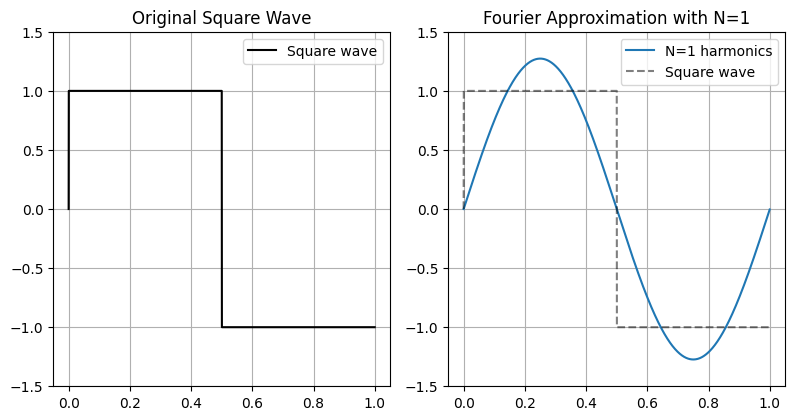

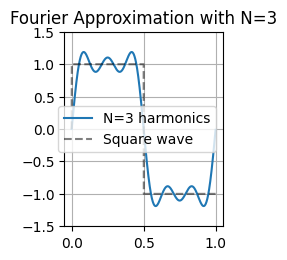

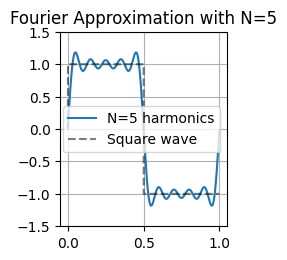

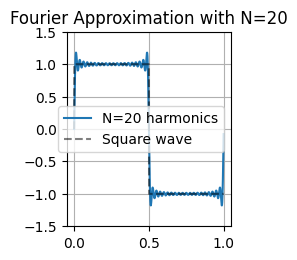

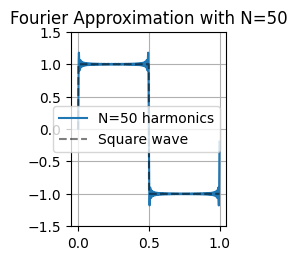

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Set parameters for the signal
N = 2048 # Number of sample points
T = 1.0 # Duration of the signal in seconds
f0 = 1 # Fundamental frequency of the square wave in Hz
# List of harmonic numbers used to construct the square wave

# THIS IS WHERE I ADDED 20 AND 50 HARMONICS
harmonics = [1, 3, 5, 20, 50]
# Define the square wave function
def square_wave(t):
  return np.sign(np.sin(2.0 * np.pi * f0 * t))
# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
  result = np.zeros_like(t)
  for k in range(N):
    # The Fourier series of a square wave contains only odd harmonics.
    n = 2 * k + 1
    # Add harmonics to reconstruct the square wave.
    result += np.sin(2 * np.pi * n * f0 * t) / n
  return (4 / np.pi) * result
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)
# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
  plt.subplot(2, 3, i)
  y = square_wave_fourier(t, f0, Nh)
  plt.plot(t, y, label=f"N={Nh} harmonics")
  plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
  plt.title(f"Fourier Approximation with N={Nh}")
  plt.ylim(-1.5, 1.5)
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

We can notice that as more frequency components are used, the signal becomes a lot more accurate by taking a square shape. However, it is important to note that ringing still occurs at the edges, which is expected.

DFT with provided code for comparison

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 8.924858 seconds
NumPy FFT Execution Time: 0.002814 seconds
FFT is approximately 3171.80 times faster.

Our DFT implementation is close to NumPy's FFT: True


/tmp/ipython-input-1155032014.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


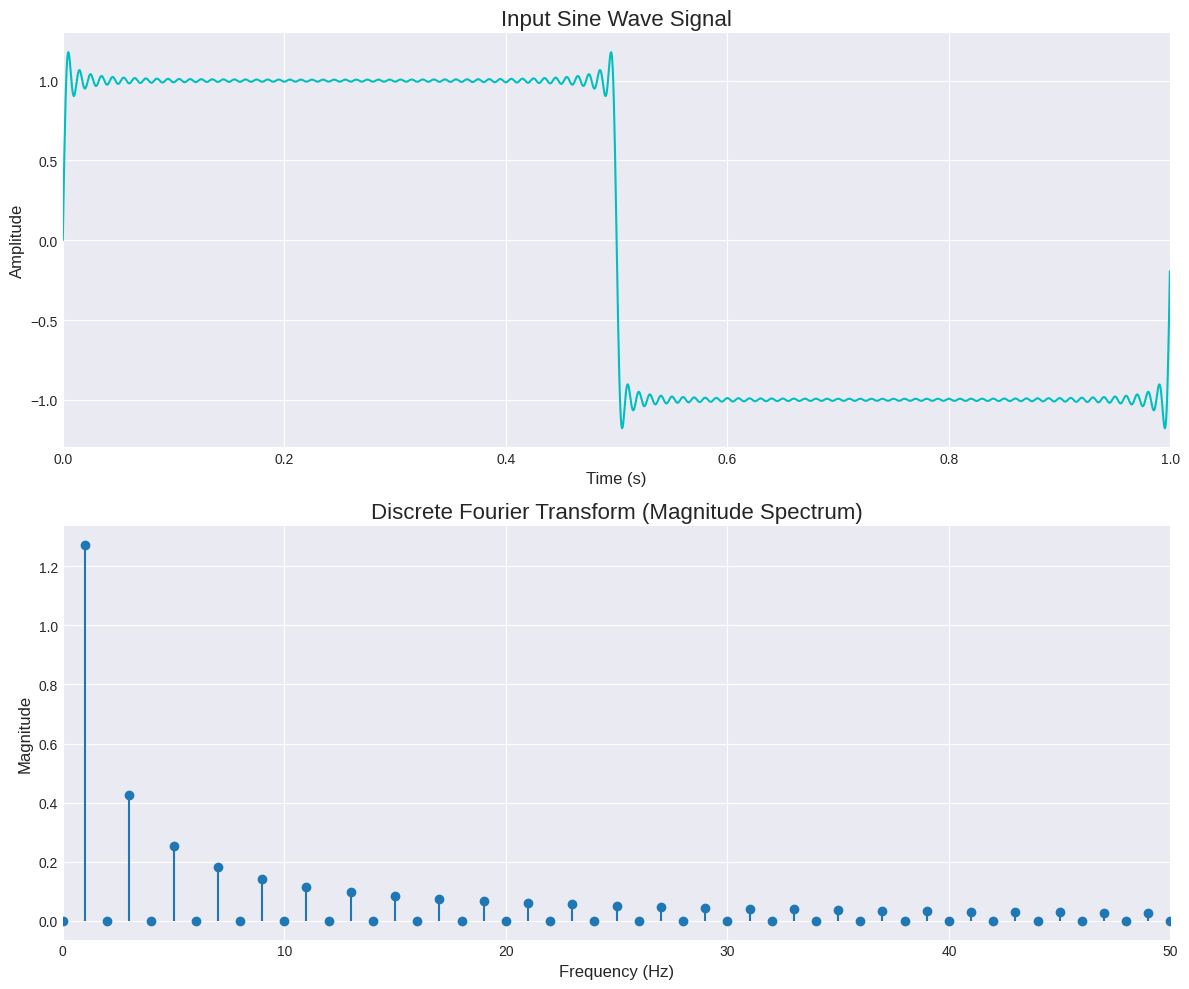

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
# 2. Apply the DFT and time the execution
def naive_dft(x):
  """
  Compute the Discrete Fourier Transform (DFT) of a 1D signal.
  This is a "naïve" implementation that directly follows the DFT formula,
  which has a time complexity of O(N^2).
  Args:
  x (np.ndarray): The input signal, a 1D NumPy array.
  3
  Returns:
  np.ndarray: The complex-valued DFT of the input signal.
  """
  N = len(x)
  # Create an empty array of complex numbers to store the DFT results
  X = np.zeros(N, dtype=np.complex128)
  # Iterate through each frequency bin (k)
  for k in range(N):
    # For each frequency bin, sum the contributions from all input samples (n)
    for n in range(N):
      # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
      angle = -2j * np.pi * k * n / N
      X[k] += x[n] * np.exp(angle)
  return X
# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)
# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive
# Time NumPy's FFT implementation
start_time_fft = time.time()

# This the the numpy fft function
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft
# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
  print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
  print("FFT was too fast to measure a significant duration difference.")
# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")
# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])
# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
# Plot the original time-domain signal
ax1.plot(t, signal, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0) # Show a few cycles of the sine wave
ax1.grid(True)
# Plot the frequency-domain signal (magnitude of the DFT)
ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title(
'Discrete Fourier Transform (Magnitude Spectrum)',
fontsize=16
)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50) # Focus on lower frequencies
ax2.grid(True)
# Add vertical lines for the first ten frequencies
for i in range(20):
  if i < len(xf) and i % 2 == 1: # Only plot odd harmonics
    ax2.axvline(
    xf[i], color='r', linestyle='--', alpha=0.7,
    label=f'f{i}: {i}* f0 = {xf[i]:.1f} Hz'
  )
  # Only show labels for first 3 frequencies to avoid cluttering
  ax2.legend()
  plt.tight_layout()
  plt.show()


Evidently, the frequency components from the naive DFT lacks the sharp edges of the square wave, as there is a lot of ringing. This is known as the Gibbs Phenomenon.

Implementing TensorFlow (TF) or PyTorch to all 3 functions.
ChatGPT prompt "change such that its using tensorflow or pytorch"

square_wave with pytorch.

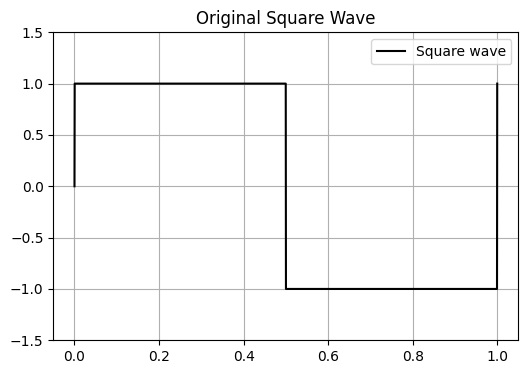

In [1]:
import torch
import matplotlib.pyplot as plt

# Parameters
N = 2048
T = 1.0
f0 = 1

# Time vector
t = torch.linspace(0.0, T, N, dtype=torch.float32)

# Original square wave function
def square_wave(t):
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

# Generate original square wave
square = square_wave(t)

# Plot original square wave
plt.figure(figsize=(6, 4))
plt.plot(t.numpy(), square.numpy(), 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()


 square_wave_fourier with pytorch.

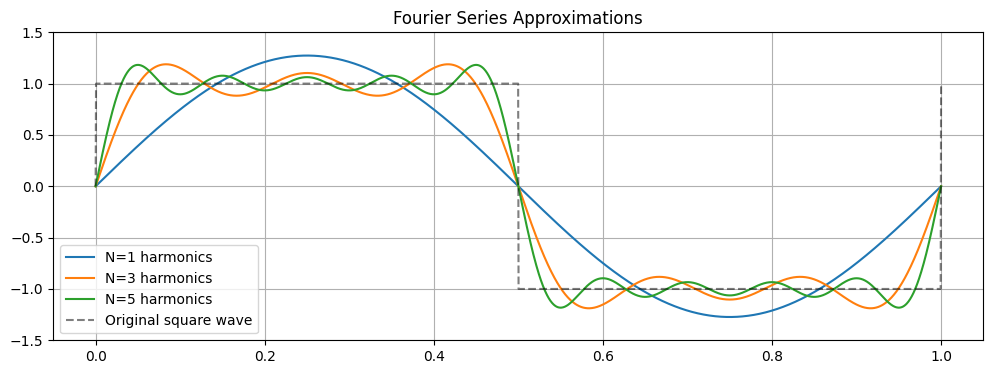

In [2]:
# Fourier series approximation function
def square_wave_fourier(t, f0, N_harmonics):
    result = torch.zeros_like(t)
    for k in range(N_harmonics):
        n = 2 * k + 1
        result += torch.sin(2 * torch.pi * n * f0 * t) / n
    return (4 / torch.pi) * result

# Harmonics to try
harmonics = [1, 3, 5]

# Plot Fourier approximations
plt.figure(figsize=(12, 4))
for i, Nh in enumerate(harmonics):
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t.numpy(), y.numpy(), label=f"N={Nh} harmonics")

plt.plot(t.numpy(), square.numpy(), 'k--', alpha=0.5, label="Original square wave")
plt.title("Fourier Series Approximations")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()


naive_dft with pytorch.

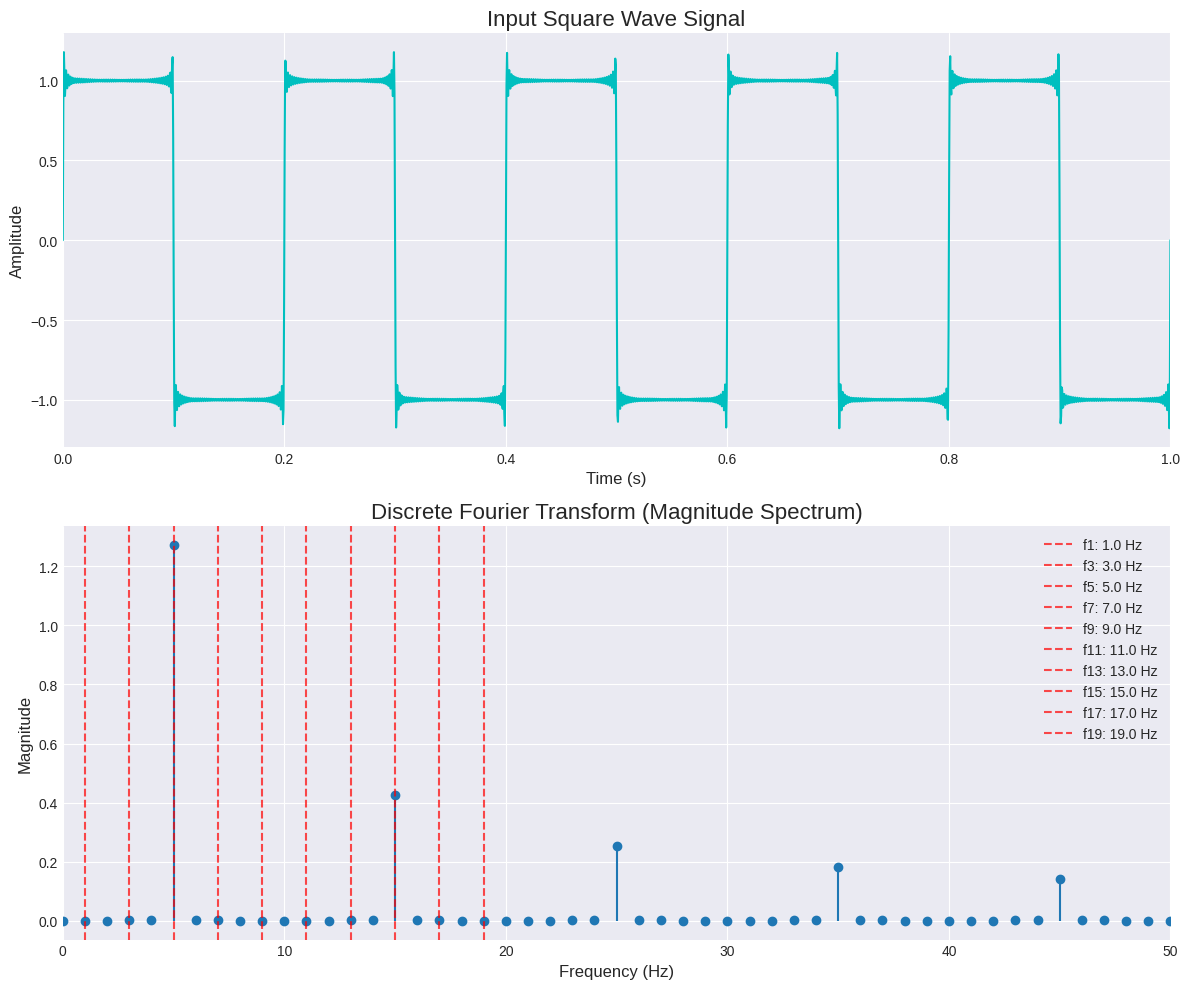

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

# Device configuration (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
N = 2048  # number of samples
T = 1.0   # total duration
f0 = 5    # fundamental frequency
t = torch.linspace(0, T, N, device=device)

# Function to create square wave using Fourier series
def square_wave_fourier(t, f0, harmonics=50):
    signal = torch.zeros_like(t)
    for k in range(1, harmonics*2, 2):  # only odd harmonics
        signal += (4 / (np.pi * k)) * torch.sin(2 * np.pi * k * f0 * t)
    return signal

# Construct square wave
signal = square_wave_fourier(t, f0, harmonics=50)

# --- Naive DFT using PyTorch ---
def naive_dft_torch(x):
    N = x.shape[0]
    X = torch.zeros(N, dtype=torch.cfloat, device=x.device)
    n = torch.arange(N, device=x.device)
    for k in range(N):
        angle = -2j * np.pi * k * n / N
        X[k] = torch.sum(x * torch.exp(angle))
    return X

# Time naive DFT
start_time_naive = time.time()
dft_result = naive_dft_torch(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time PyTorch FFT
start_time_fft = time.time()
fft_result = torch.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft


# Prepare for plotting
xf = torch.fft.fftfreq(N, d=T/N)[:N//2].cpu().numpy()
magnitude = (2.0/N * torch.abs(dft_result[:N//2])).cpu().numpy()

# Plotting
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(t.cpu(), signal.cpu(), color='c')
ax1.set_title('Input Square Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0)
ax1.grid(True)

ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)
ax2.grid(True)

for i in range(20):
    if i < len(xf) and i % 2 == 1:
        ax2.axvline(xf[i], color='r', linestyle='--', alpha=0.7, label=f'f{i}: {xf[i]:.1f} Hz')

ax2.legend()
plt.tight_layout()
plt.show()


Now without using pytorch/tensorflow built in fft functions.
ChatGPT prompt:
"create a second version that explicitly runs on the GPU using TF/PyTorch tensor operations (rather than their built-in FFT functions, which behave similarly to NumPy’s implementation)."  

Using device: cuda


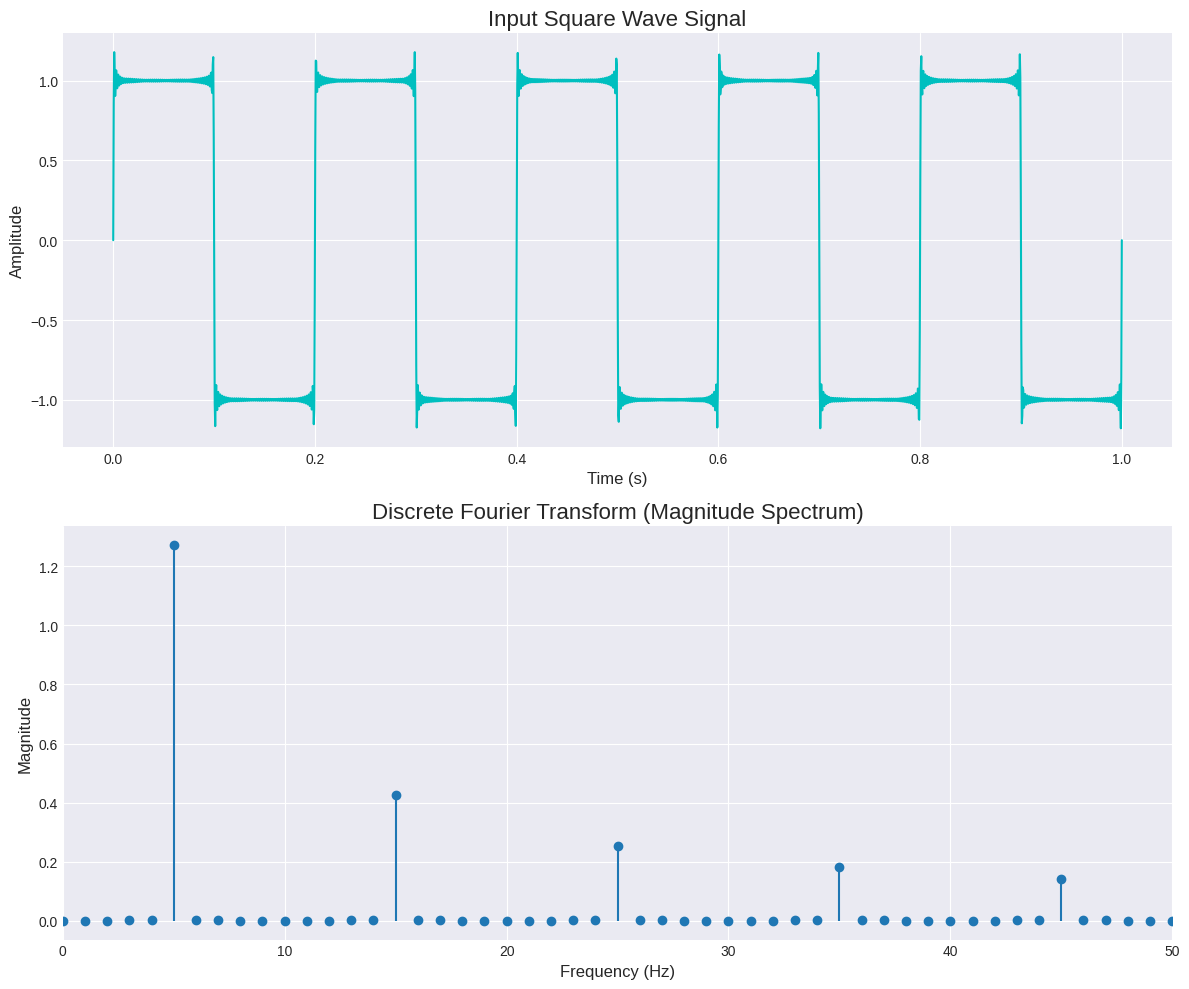

In [7]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

# Device configuration (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Parameters
N = 2048  # number of samples
T = 1.0   # total duration
f0 = 5    # fundamental frequency
t = torch.linspace(0, T, N, device=device)

# Square wave construction using Fourier series
def square_wave_fourier(t, f0, harmonics=50):
    signal = torch.zeros_like(t)
    for k in range(1, harmonics*2, 2):  # only odd harmonics
        signal += (4 / (np.pi * k)) * torch.sin(2 * np.pi * k * f0 * t)
    return signal

signal = square_wave_fourier(t, f0, harmonics=50)

# --- Fully Vectorized DFT on GPU ---
def dft_gpu_vectorized(x):
    N = x.shape[0]
    x = x.to(torch.complex64)  # Convert input to complex type
    n = torch.arange(N, device=x.device)
    k = n.view(N, 1)  # column vector
    exponent = -2j * np.pi * k * n / N
    W = torch.exp(exponent)
    X = W @ x
    return X


# Time the GPU vectorized DFT
start_time = time.time()
dft_result = dft_gpu_vectorized(signal)
end_time = time.time()
# print(f"Vectorized DFT execution time: {end_time - start_time:.6f} seconds")

# Optional: compare with PyTorch's FFT
fft_result = torch.fft.fft(signal)
# print("Close to PyTorch FFT:", torch.allclose(dft_result, fft_result, atol=1e-6))

# Prepare frequency axis and magnitude for plotting
xf = torch.fft.fftfreq(N, d=T/N)[:N//2].cpu().numpy()
magnitude = (2.0/N * torch.abs(dft_result[:N//2])).cpu().numpy()

# Plot results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(t.cpu(), signal.cpu(), color='c')
ax1.set_title('Input Square Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.grid(True)

ax2.stem(xf, magnitude, basefmt=" ")
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50)
ax2.grid(True)

plt.tight_layout()
plt.show()


ChatGPT prompt: "Change the size of the data and note the change in timings of the three methods

In [5]:
import torch
import time
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Function 1: Original square wave
def square_wave(t, f0=1):
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

# Function 2: Fourier series approximation
def square_wave_fourier(t, f0=1, harmonics=50):
    result = torch.zeros_like(t)
    for k in range(harmonics):
        n = 2*k + 1
        result += torch.sin(2*torch.pi*n*f0*t)/n
    return (4/np.pi)*result

# Function 3: Fully vectorized DFT
def dft_gpu_vectorized(x):
    x = x.to(torch.complex64)
    N = x.shape[0]
    n = torch.arange(N, device=x.device)
    k = n.view(N, 1)
    W = torch.exp(-2j * np.pi * k * n / N)
    X = W @ x
    return X

# Test different signal sizes
signal_sizes = [256, 512, 1024, 2048, 4096]  # you can increase further if GPU memory allows
harmonics = 50
f0 = 1

for N in signal_sizes:
    print(f"\nSignal size: {N}")
    t = torch.linspace(0, 1.0, N, device=device)

    # Original square wave
    start = time.time()
    square = square_wave(t, f0)
    end = time.time()
    print(f"Square wave: {end-start:.6f} s")

    # Fourier series
    start = time.time()
    fourier = square_wave_fourier(t, f0, harmonics)
    end = time.time()
    print(f"Fourier series ({harmonics} harmonics): {end-start:.6f} s")

    # Vectorized DFT
    start = time.time()
    dft = dft_gpu_vectorized(fourier)
    end = time.time()
    print(f"Vectorized DFT: {end-start:.6f} s")


Using device: cuda

Signal size: 256
Square wave: 0.029807 s
Fourier series (50 harmonics): 0.001975 s
Vectorized DFT: 0.000406 s

Signal size: 512
Square wave: 0.000053 s
Fourier series (50 harmonics): 0.001826 s
Vectorized DFT: 0.000185 s

Signal size: 1024
Square wave: 0.000042 s
Fourier series (50 harmonics): 0.001814 s
Vectorized DFT: 0.000162 s

Signal size: 2048
Square wave: 0.000038 s
Fourier series (50 harmonics): 0.001782 s
Vectorized DFT: 0.000128 s

Signal size: 4096
Square wave: 0.000036 s
Fourier series (50 harmonics): 0.001762 s
Vectorized DFT: 0.000762 s


The above results make sense as:
1. square_wave() is just one single operation.
2. square_wave_fourier() is O(N), due to the 1 loop
3. naive_dft() without built in torch fft functions (aka dft_gpu_vectorized) has 1 for loop nestled inside another, hence making it O(N^2)


# Part 2

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


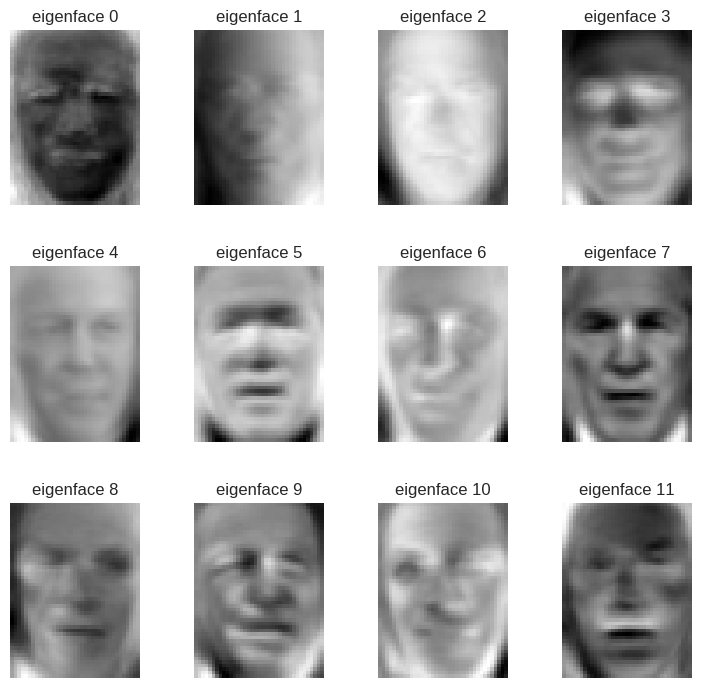

(966,)


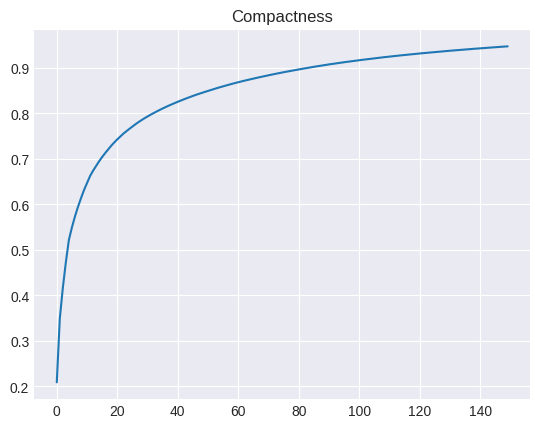

In [15]:
# First load the relevant data and functions

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


#Extract the meaningful parameters of the faces dataset

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# split the data accordingly into training and testing sets to
# avoid contamination of the model. Ideally, you should also have a validation set.

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150


# Compute the PCA via eigen-decomposition of the data matrix X after
# the mean of the training set is removed. This results in
# a model with variations from the mean. We also transform the training and
# testing data into ’face space’, i.e. the learned sub space of the eigen-faces.

# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)


#Finally, plot the resulting eigen-vectors of the face PCA model, AKA the eigenfaces

import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()


# We should always evaluate the performance of the dimensionality reduction
# via a compactness plot

explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

# x axis is eigenvalue count
# y axis is ratio_cumsum



Steep rise at the beginning: first few eigenfaces capture most of the variance.

Flattening curve: later eigenfaces add little additional information.